In [4]:
import xarray as xr
import sacpy as scp
import matplotlib.pyplot as plt
import numpy as np

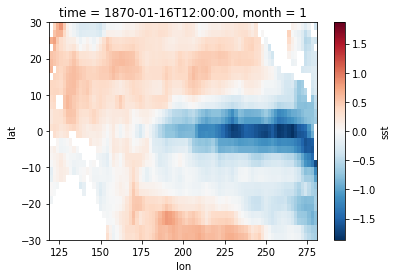

In [6]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst = xr.where(np.abs(sst)>100,np.NAN,sst)

ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()
sstas = ssta.loc[:,-30:30,120:280]
sstas[0].plot()